In [117]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
import pandas as pd
import keras
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [119]:
file = open("merged_data_with_got_ocr.csv", 'r')
df = pd.read_csv(file)

df['Institutional_Form'] = df['Institutional_Form'].str.lower()
df['Institutional_Form'] = df['Institutional_Form'].replace('cooperative purchasing agreement', 'cooperative purchasing arrangements')
df['Institutional_Form'] = df['Institutional_Form'].replace('transfer of authority', 'transfer of functions')
df['Institutional_Form'] = df['Institutional_Form'].replace('transfer of responsibility', 'transfer of functions')
df['Institutional_Form'] = df['Institutional_Form'].replace('joint facilities', 'joint facilities/co-location')
df['Institutional_Form'] = df['Institutional_Form'].replace('joint production', 'Joint Operations')
df['Institutional_Form'] = df['Institutional_Form'].replace('joint facilities/co-location and joint operations', 'joint facilities/co-location')
df['Institutional_Form'] = df['Institutional_Form'].replace('cooperative purchasing agreement and new joint entities', 'cooperative purchasing arrangements')
df['Institutional_Form'] = df['Institutional_Form'].replace('service contract and grants/other subsidies', 'service contract')
df['Institutional_Form'].value_counts()

Institutional_Form
service contract                       555
joint operations                       172
new joint entities                     120
resource sharing                        76
joint facilities/co-location            29
transfer of functions                   28
grants/other subsidies                  26
cooperative purchasing arrangements     15
Joint Operations                         5
coproduction                             5
other                                    2
Name: count, dtype: int64

In [151]:
len(df)

1031

/var/folders/2l/yz2br5b90k3967p2xl16txm80000gn/T/ipykernel_5181/3968786434.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


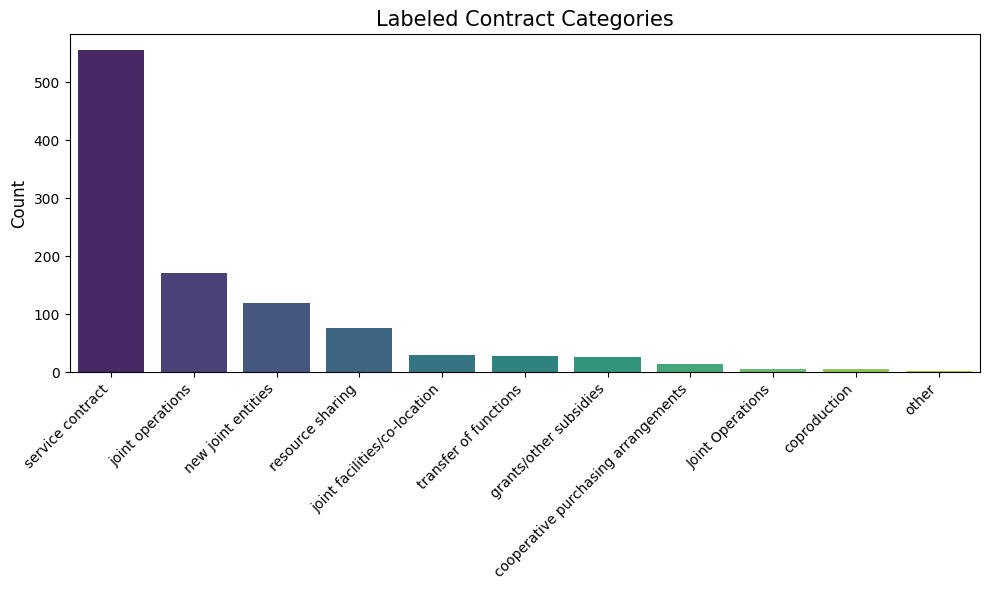

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts of 'Institutional_Form'
value_counts = df['Institutional_Form'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Labeled Contract Categories', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [125]:
def clean_text(text):
    # Remove newline-separated letters
    cleaned_text = re.sub(r'(\n[a-zA-Z])', '', text)
    # Remove single newlines or extraneous spaces
    cleaned_text = re.sub(r'\n+', ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'11.', ' ', cleaned_text).strip()
    cleaned_text = re.sub(r"\n\'", ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'\n', ' ', cleaned_text).strip()
    ##Patterns found
    cleaned_text = re.sub(r'\n', ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'\.{2,}\s{1,}', ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'\.{2,}', ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'\({2,}' , ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'\){2,}'  , ' ', cleaned_text).strip()
    cleaned_text = re.sub(r'~{2,}', ' ', cleaned_text).strip()
    
    return cleaned_text

In [127]:
#dropping the class with only two instances
class_counts = df['Institutional_Form'].value_counts()
classes_to_drop = class_counts[class_counts <= 2].index
df = df[~df['Institutional_Form'].isin(classes_to_drop)]
#to_synth=["service contract","new joint entities","joint operations"]#,"resource sharing"]
#df = df[df['Institutional_Form'].isin(to_synth)]

df = df.reset_index(drop=True)


In [95]:
df

,ID,Service _Area,Length,Renewal,Purpose,Institutional_Form,Des_of_IM,Second_Institutional_Form,Des_of_SIM,Funding,...,city_count,county_count,fire_district_count,private_or_nonprofit_count,regional_or_district_count,school_district_count,state_agency_count,township_count,other_count,got_ocr_text
0,M036380,Criminal,Indefinite,No,The county provides legal services to the city,service contract,The city shall pay to the County the amount pr...,No,NaN,The city pays to the county for the service re...,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,(415101 / - file eica Fie No 0738 I/C Recorded...
1,M039354,Criminal,Indefinite,No,Creation of Criminal Information Committee: a ...,joint operations,The commission was established to oversee the ...,No,NaN,No,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FILL E C E . . . C T A Y OF SIATE 100A SEP 26 ...
2,M500728,Criminal,Indefinite,No,"coordinate drug law investigation, enforcement...",joint operations,The participating members created a task force...,No,NaN,No,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Michael A. Mauro Secretary of State State of I...
3,M501039,Criminal,indefinite,No,Implement joint and/or cooeprative action in d...,joint operations,The participating members created a task force...,No,NaN,"Obtain local, state/federal grant monies vaila...",...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,WAYNE COUNTY BY: Chairperson Wayne County Boar...
4,M501251,Criminal,Indefinite,No,Creation of taskforce to Jointly combat the il...,new joint entities,A multi-juristiction task force was organized ...,No,NaN,Each agency must be responsible for the cost i...,...,8.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,for keeping the Executive Committee informed o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,M509037,NaN,NaN,NaN,NaN,service contract,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FILED Paul D. Pate 28 E OF FEE SERIES FOR THE ...
843,M509050,NaN,NaN,NaN,NaN,service contract,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CITY OF PIERSON, IOWA— PIERSON VOLUNTEER FIRE ..."
844,M509059,NaN,NaN,NaN,NaN,service contract,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Prepared by: David D. Dixon, N. Market, Oskalo..."
845,M509708,NaN,NaN,NaN,NaN,service contract,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9. RENEWAL & TERMINATION. This Agreement shall...


In [129]:
for i in range(len(df)):
    df.loc[i, 'got_ocr_text'] = clean_text(df['got_ocr_text'][i])


In [107]:
# The input text, example could be list of sentences
texts = df['got_ocr_text']

# The labels corresponding to the input text
labels = df['Institutional_Form']


# Hyperparameters 
max_words = 10000 # max number of words to use in the vocabulary
max_len = 1000 # max length of each text (in terms of number of words)
embedding_dim = 100 # dimension of word embeddings
lstm_units = 8 # number of units in the LSTM layer
#num_classes = len(set(labels)) # number of classes

# Encode the string labels as integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Institutional_Form'])

# One-hot encode the labels
y = keras.utils.to_categorical(labels, num_classes=len(label_encoder.classes_))

# Update num_classes to match the one-hot encoding
num_classes = len(label_encoder.classes_)


# Tokenize the texts and create a vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences so they all have the same length
x = pad_sequences(sequences, maxlen=max_len)

# Create one-hot encoded labels
y = keras.utils.to_categorical(labels, num_classes)

X_train, X_val, y_train, y_val = train_test_split(x, 
                                                  y, 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  stratify=y)

# Build the model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units))

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model.fit(x, y, batch_size=32, epochs=50)

history = model.fit(X_train, y_train,batch_size=32, epochs=50,
                    validation_data=(X_val, y_val), 
                    validation_steps=30)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 481ms/step - accuracy: 0.5384 - loss: 1.0800 - val_accuracy: 0.6529 - val_loss: 1.0173
Epoch 2/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 523ms/step - accuracy: 0.6539 - loss: 0.9667 - val_accuracy: 0.6529 - val_loss: 0.9369
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 513ms/step - accuracy: 0.6469 - loss: 0.8851 - val_accuracy: 0.6471 - val_loss: 0.9055
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 568ms/step - accuracy: 0.6670 - loss: 0.7827 - val_accuracy: 0.6412 - val_loss: 0.8972
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 730ms/step - accuracy: 0.7721 - loss: 0.6411 - val_accuracy: 0.6235 - val_loss: 0.9269
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 566ms/step - accuracy: 0.8265 - loss: 0.5195 - val_accuracy: 0.6118 - val_loss: 1.0610
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 548ms/step - accuracy: 0.8418 - loss: 0.4458 - val_accuracy: 0.6235 - val_loss: 1.0794
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 534ms/step - accuracy: 0.8513 - loss: 0.4143 - val_accuracy: 0.6059 - val_loss: 1.0805
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - accuracy: 0.8858 - loss: 0.3540 - val_accuracy: 0.576

In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


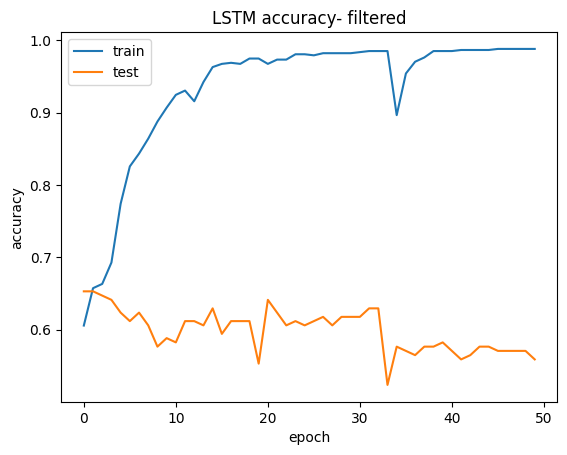

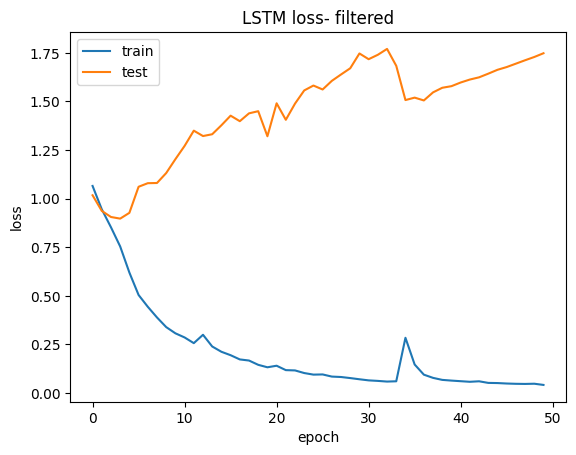

In [109]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM accuracy- filtered')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss- filtered')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,128,672 (11.93 MB)

 Trainable params: 1,042,890 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,085,782 (7.96 MB)

In [111]:
# test the model
test_loss, test_accuracy = model.evaluate(X_val, y_val, batch_size=32)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5605 - loss: 1.7988
Test Loss: 1.7479580640792847
Test Accuracy: 0.5588235259056091


In [113]:
# Get predictions (as probabilities)
y_pred_probs = model.predict(X_val, batch_size=32)

# Convert probabilities to class indices (for categorical crossentropy)
y_pred_classes = y_pred_probs.argmax(axis=1)

# Convert one-hot true labels to class indices if needed
y_true = y_val.argmax(axis=1) if len(y_val.shape) > 1 else y_test

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


                    precision    recall  f1-score   support

  joint operations       0.15      0.11      0.13        35
new joint entities       0.38      0.33      0.36        24
  service contract       0.68      0.75      0.71       111

          accuracy                           0.56       170
         macro avg       0.40      0.40      0.40       170
      weighted avg       0.53      0.56      0.54       170



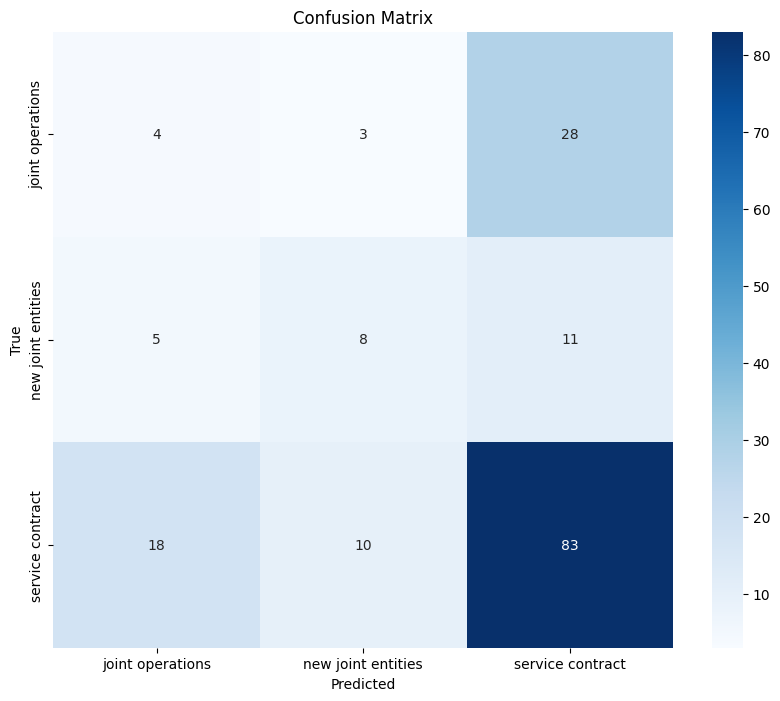

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate a classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [139]:
#SVM
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

X = df['got_ocr_text']
y = df['Institutional_Form']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # max_features limits the number of features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize the SVM model
svm = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training set
svm.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
y_pred = svm.predict(X_test_tfidf)

# Print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))
# Initialize the SVM model
svm = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training set
svm.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
y_pred = svm.predict(X_test_tfidf)

# Print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 67.15%
Classification Report:
                                     precision    recall  f1-score   support

                   Joint Operations       0.00      0.00      0.00         1
cooperative purchasing arrangements       0.50      0.50      0.50         2
                       coproduction       0.00      0.00      0.00         2
             grants/other subsidies       0.00      0.00      0.00         6
       joint facilities/co-location       0.00      0.00      0.00         7
                   joint operations       0.39      0.38      0.39        34
                 new joint entities       0.62      0.71      0.67        14
                   resource sharing       1.00      0.27      0.42        15
                   service contract       0.73      0.93      0.82       120
              transfer of functions       0.00      0.00      0.00         6

                           accuracy                           0.67       207
                          macro av

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 67.15%
Classification Report:
                                     precision    recall  f1-score   support

                   Joint Operations       0.00      0.00      0.00         1
cooperative purchasing arrangements       0.50      0.50      0.50         2
                       coproduction       0.00      0.00      0.00         2
             grants/other subsidies       0.00      0.00      0.00         6
       joint facilities/co-location       0.00      0.00      0.00         7
                   joint operations       0.39      0.38      0.39        34
                 new joint entities       0.62      0.71      0.67        14
                   resource sharing       1.00      0.27      0.42        15
                   service contract       0.73      0.93      0.82       120
              transfer of functions       0.00      0.00      0.00         6

                           accuracy                           0.67       207
                          macro av

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


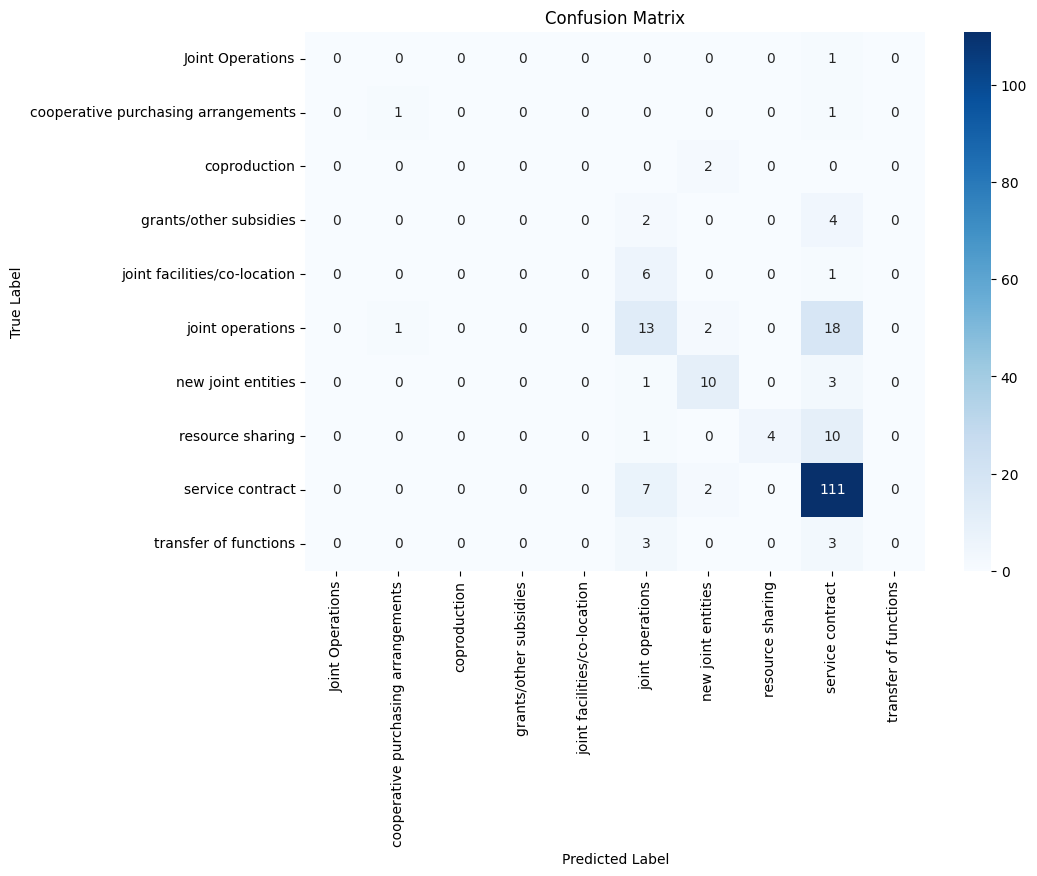

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test are the true labels and y_pred are the predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()